<a href="https://colab.research.google.com/github/feliperodighero/curso-django-projeto1/blob/main/PyTorch04_WebSite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


root: str- para qual pasta você deseja baixar os dados?

train: Bool- você quer a divisão de treinamento ou teste?

download: Bool- os dados devem ser baixados?

transform: torchvision.transforms- que transformações você gostaria de fazer nos dados?

target_transform- você também pode transformar os alvos (rótulos) se quiser

In [ ]:
# baixando dados do mnist
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

O erro que você está vendo é porque a função imshow() do matplotlib espera que as imagens em escala de cinza (grayscale) sejam 2D (altura x largura), enquanto as imagens coloridas (RGB) sejam 3D (altura x largura x canais de cor)1. No seu caso, a imagem tem uma dimensão extra devido ao canal de cor único (1, 28, 28), o que está causando o erro.

Para resolver isso, você pode usar o método squeeze() para remover a dimensão do canal de cor, ou você pode selecionar explicitamente uma fatia 2D da imagem.

Image shape: torch.Size([1, 28, 28])


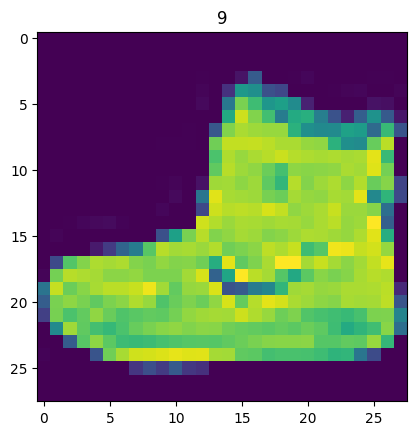

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

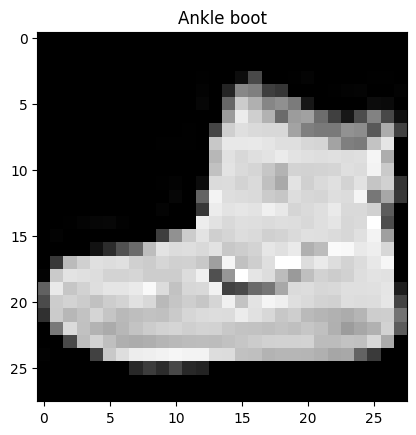

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

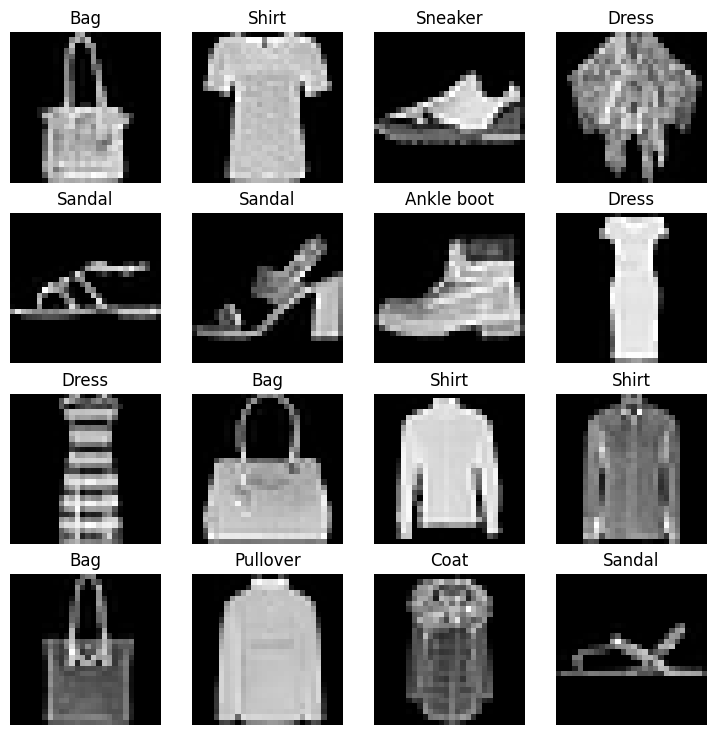

In [ ]:
# Plot more images
torch.manual_seed = 42
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7acec0d4c370>, <torch.utils.data.dataloader.DataLoader object at 0x7acec0d4fbe0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


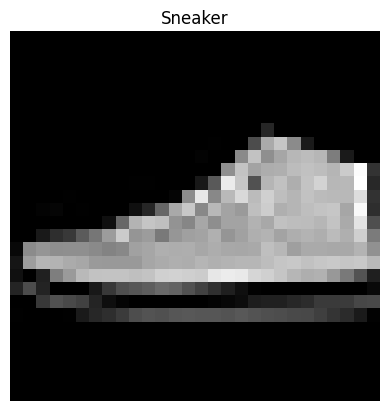

In [ ]:
torch.manual_seed = 42
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed = 42

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed = 42
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')

    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f'Olhando para {batch + len(x)}/{len(train_dataloader.dataset)} amostra')

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f'\n Train loss: {train_loss:.5f} - Test loss: {test_loss:.5f} - Test Acurácia: {test_acc:.2f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Olhando para 1/60000 amostra
Olhando para 401/60000 amostra
Olhando para 801/60000 amostra
Olhando para 1201/60000 amostra
Olhando para 1601/60000 amostra

 Train loss: 0.58416 - Test loss: 0.60610 - Test Acurácia: 79.27
Epoch: 1
-----
Olhando para 1/60000 amostra
Olhando para 401/60000 amostra
Olhando para 801/60000 amostra
Olhando para 1201/60000 amostra
Olhando para 1601/60000 amostra

 Train loss: 0.47552 - Test loss: 0.49133 - Test Acurácia: 82.90
Epoch: 2
-----
Olhando para 1/60000 amostra
Olhando para 401/60000 amostra
Olhando para 801/60000 amostra
Olhando para 1201/60000 amostra
Olhando para 1601/60000 amostra

 Train loss: 0.45633 - Test loss: 0.48583 - Test Acurácia: 82.06
Train time on cpu: 47.151 seconds


In [ ]:
torch.manual_seed = 42
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4858311712741852,
 'model_acc': 82.05870607028754}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [ ]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} - Train acuracia: {train_acc:.2f}%')


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y,
                                    y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f'Test loss: {test_loss:.5f} - Test acurácia {test_acc:.2f}%')

In [ ]:
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoca: {epoch}\n---')

    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)

    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_end_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoca: 0
---
Train loss: 1.05991 - Train acuracia: 65.41%
Test loss: 0.93736 - Test acurácia 70.50%
Epoca: 1
---
Train loss: 0.90150 - Train acuracia: 70.84%
Test loss: 0.92278 - Test acurácia 71.40%
Epoca: 2
---
Train loss: 0.87241 - Train acuracia: 72.22%
Test loss: 0.87476 - Test acurácia 73.30%
Train time on cpu: 0.000 seconds


In [ ]:
# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8747615218162537,
 'model_acc': 73.30271565495208}

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8747615218162537,
 'model_acc': 73.30271565495208}

In [ ]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4858311712741852,
 'model_acc': 82.05870607028754}

In [ ]:
# Rede convolutional
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed = 42
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:


# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[-0.2049, -0.2002,  0.7467,  ..., -0.7712,  1.4702, -0.4276],
         [-0.8760, -0.1668, -1.9245,  ..., -0.9648, -0.8274,  0.3213],
         [ 1.3892,  0.5814, -1.3275,  ..., -1.5783,  0.6962,  0.0611],
         ...,
         [ 0.3644,  1.7383, -0.9378,  ...,  1.6582, -0.6476,  1.0518],
         [ 0.2246,  0.8887, -1.0491,  ...,  0.4326,  1.6052, -1.1625],
         [ 0.1528,  1.9938, -0.3463,  ..., -0.3763,  0.1439, -0.0853]],

        [[-1.4677, -0.2945, -0.5082,  ..., -1.3371, -1.7340, -0.3901],
         [ 0.0396, -0.2160, -0.2509,  ...,  0.0522, -2.1716,  0.2504],
         [-0.9114,  0.8309,  0.2278,  ..., -0.3639,  0.9840, -0.4587],
         ...,
         [-0.0602, -0.3998, -1.2476,  ..., -0.1593, -0.3242, -1.6108],
         [-0.4267,  0.6551, -2.5973,  ..., -2.1831,  1.0695,

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[-0.1160,  0.0575,  0.3675,  ..., -0.6976, -0.1346,  0.1477],
         [ 0.0795, -0.7822,  0.5708,  ..., -1.2633, -0.2412,  0.5518],
         [-0.4234,  0.1963, -0.8780,  ..., -0.8603, -0.5809, -0.8209],
         ...,
         [-0.1521,  0.7383, -0.1775,  ..., -0.2809,  0.1607, -0.2421],
         [-0.6810,  0.0389,  0.0450,  ..., -0.0511,  0.8977, -0.1499],
         [-0.0018, -0.4244,  0.9526,  ...,  1.0734, -0.6856,  0.8805]],

        [[-0.2558,  0.5978,  0.0532,  ...,  0.6024, -0.2603, -0.4084],
         [ 0.4194, -0.2697, -0.8834,  ...,  0.5338, -0.0179, -0.4730],
         [-0.2201, -0.6603, -0.0235,  ...,  0.2376, -1.1693, -0.2857],
         ...,
         [-0.0513, -0.4555, -0.1993,  ..., -0.6898, -1.3219, -0.8576],
         [ 1.0617, -0.9418,  0.0592,  ..., -0.0661, -1.0012,  0.6100],
         [ 0.7667,  0.2309, -0.4559,  ..., -0.3615, -0.5003, -0.3402]],

        [[ 0.0071,  0.8261,  0.1311,  ..., -0.5457,  0.3033,  0.7212],
         [ 0.0737,  0.8276,  0.6497,  ..., -0

In [ ]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [ ]:
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [ ]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0155,  0.0711,  0.1061,  0.0971, -0.0774],
          [ 0.0007, -0.0022, -0.1070, -0.0618, -0.0455],
          [-0.1154,  0.1048,  0.0192,  0.0677, -0.0910],
          [ 0.0286,  0.0397,  0.0517,  0.0727,  0.1064],
          [ 0.0884, -0.0838, -0.0439, -0.0863,  0.0446]],

         [[-0.0483, -0.0316, -0.0687,  0.0704, -0.0630],
          [-0.0735, -0.0065, -0.0774,  0.0516,  0.0856],
          [ 0.0391,  0.0394,  0.0003,  0.0336,  0.0812],
          [ 0.0038, -0.0836,  0.0708, -0.0830,  0.0995],
          [ 0.0615,  0.0216,  0.0837, -0.0956, -0.0314]],

         [[-0.0477,  0.0009,  0.0943, -0.0154, -0.0016],
          [ 0.0619, -0.0816, -0.0235,  0.0528,  0.0106],
          [-0.0494, -0.0254,  0.0258, -0.0795, -0.1085],
          [ 0.0672, -0.0986, -0.1103, -0.0153, -0.0702],
          [-0.0416,  0.1069, -0.0887,  0.1116,  0.0611]]],


        [[[-0.0587,  0.0718, -0.0475, -0.0843, -0.0690],
          [ 0.0278, -0.0989,  0.0802,  0.0167, -0.0294],

In [ ]:
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:

# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[ 0.9442, -2.2533],
          [-0.4168,  0.0581]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.9442]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [ ]:
train_time_start_model_2 = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoca: {epoch}\n---')
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
               )
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
              )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoca: 0
---
Train loss: 0.64093 - Train acuracia: 76.42%
Test loss: 0.45802 - Test acurácia 83.50%
Epoca: 1
---
Train loss: 0.37642 - Train acuracia: 86.37%
Test loss: 0.41997 - Test acurácia 83.87%
Epoca: 2
---
Train loss: 0.33586 - Train acuracia: 87.78%
Test loss: 0.33057 - Test acurácia 88.16%
Train time on cpu: 166.692 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33056917786598206,
 'model_acc': 88.15894568690096}

In [ ]:
# Capitulo 3 - 8

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.485831,82.058706
1,FashionMNISTModelV1,0.874762,73.302716
2,FashionMNISTModelV2,0.330569,88.158946


In [ ]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.485831,82.058706,47.150533
1,FashionMNISTModelV1,0.874762,73.302716,0.000000
2,FashionMNISTModelV2,0.330569,88.158946,166.692190


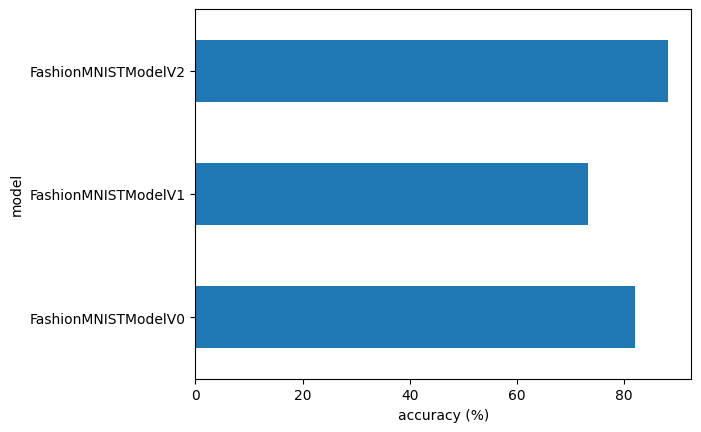

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)
            print(pred_logit.shape)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            print(pred_prob.shape)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [ ]:
import random


In [ ]:
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Testar o formato da imagem de amostra: {test_samples[0].shape}\nEtiqueta de amostra de teste: {test_labels[0]} ({class_names[test_labels[0]]})")

Testar o formato da imagem de amostra: torch.Size([1, 28, 28])
Etiqueta de amostra de teste: 0 (T-shirt/top)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])


tensor([[9.9030e-01, 1.4938e-05, 2.3251e-03, 1.2663e-03, 2.9276e-06, 2.7836e-07,
         6.0645e-03, 1.9145e-06, 2.8009e-05, 5.4626e-07],
        [1.0915e-04, 2.1918e-05, 4.3046e-01, 3.2970e-05, 5.6686e-01, 3.1802e-07,
         2.4878e-03, 4.6006e-08, 2.4476e-05, 1.6216e-07]])

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])


tensor([[9.9030e-01, 1.4938e-05, 2.3251e-03, 1.2663e-03, 2.9276e-06, 2.7836e-07,
         6.0645e-03, 1.9145e-06, 2.8009e-05, 5.4626e-07],
        [1.0915e-04, 2.1918e-05, 4.3046e-01, 3.2970e-05, 5.6686e-01, 3.1802e-07,
         2.4878e-03, 4.6006e-08, 2.4476e-05, 1.6216e-07]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 4, 7, 3, 3, 8, 5, 6, 0])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([0, 4, 7, 3, 3, 8, 5, 6, 0], tensor([0, 4, 7, 3, 3, 8, 5, 6, 0]))

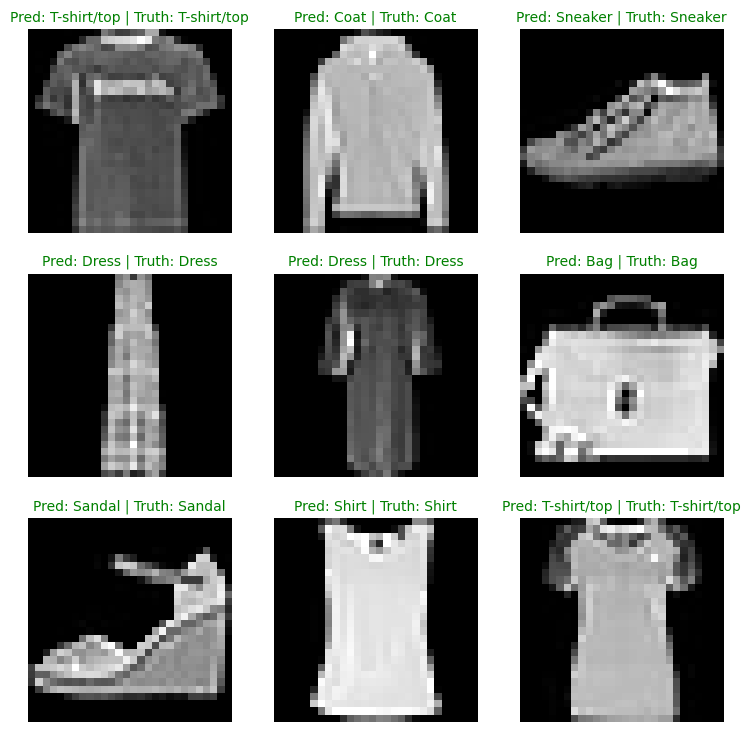

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
# Nº 1. Faça previsões com modelo treinado
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Pegar predicoes'):
        # Envie dados e alvos para o dispositivo de destino
        X, y = X.to(device), y.to(device)
        # Faça o passe para frente
        y_logit = model_2(X)
        # Transformar previsões de logits -> probabilidades de previsão -> rótulos de previsões
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # nota: execute softmax na dimensão "logits", não na dimensão "lote" (neste caso, temos um tamanho de lote de 32, portanto, podemos executar em dim=1)
        # Coloque previsões na CPU para avaliação
        y_preds.append(y_pred.cpu())
# Concatena lista de previsões em um tensor
y_pred_tensor = torch.cat(y_preds)

Pegar predicoes:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.8 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

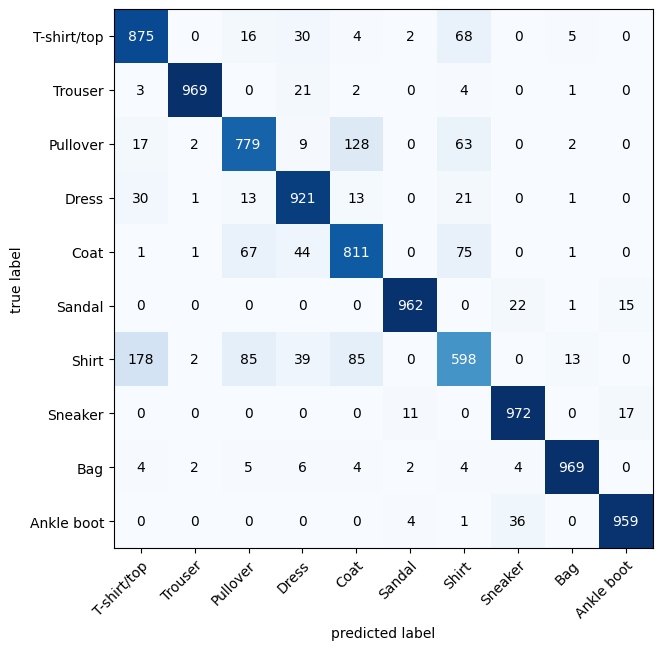

In [ ]:
# 2. Configure a instância da matriz de confusão e compare as previsões com os alvos
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Trace a matriz de confusão
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib gosta de trabalhar com NumPy
    class_names=class_names, # transforma os rótulos de linhas e colunas em nomes de classes
    figsize=(10,7)
)

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33056917786598206,
 'model_acc': 88.15894568690096}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33056917786598206,
 'model_acc': 88.15894568690096}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)